KRR Report 에서 오른쪽 위의 데이터 가져와서 출력하기
- http://www.kbreport.com/main

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
url = 'http://www.kbreport.com/main'
url = 'file:///C:/Users/wtime/Downloads/팀%20타격메인기록%20_%20KBReport.html'
#tables =  pd.read_html(url, encoding='cp949')
tables =  pd.read_html(url, index_col = 1) # 첫번째 컬럼이 인덱스다
len(tables)

1

In [15]:
baseball = tables[0]
baseball.shape

(11, 20)

In [16]:
baseball.head()

,#,경기,승,무,패,승률,기대승률,R/G,득점,홈런,도루,볼넷%,삼진%,BABIP,타율,출루율,장타율,OPS,wOBA,WAR
팀명,,,,,,,,,,,,,,,,,,,,
SK,1.0,77,51,1,25,0.671,0.606,4.70,362,69,56,8.5,17.7,0.303,0.263,0.337,0.387,0.724,0.329,8.69
두산,2.0,78,48,0,30,0.615,0.625,5.03,392,47,52,11.3,15.5,0.313,0.273,0.361,0.390,0.751,0.346,14.22
LG,3.0,76,43,1,32,0.573,0.522,4.25,323,48,55,8.1,17.0,0.303,0.260,0.329,0.368,0.697,0.318,5.22
Hero,4.0,79,45,0,34,0.570,0.597,5.34,422,59,57,9.3,17.2,0.326,0.280,0.353,0.409,0.762,0.346,14.43
NC,5.0,76,37,0,39,0.487,0.486,4.64,353,71,37,7.7,16.9,0.318,0.279,0.343,0.419,0.762,0.342,11.71


In [17]:
baseball.tail()

,#,경기,승,무,패,승률,기대승률,R/G,득점,홈런,도루,볼넷%,삼진%,BABIP,타율,출루율,장타율,OPS,wOBA,WAR
팀명,,,,,,,,,,,,,,,,,,,,
KIA,7.0,76,32,1,43,0.427,0.433,4.47,340,41,50,9.5,17.0,0.317,0.269,0.345,0.381,0.726,0.333,9.65
KT,8.0,78,33,0,45,0.423,0.411,4.27,333,52,52,8.7,18.3,0.319,0.269,0.338,0.369,0.707,0.325,7.44
한화,9.0,76,31,0,45,0.408,0.443,4.45,338,51,67,9.1,21.2,0.305,0.249,0.325,0.363,0.688,0.315,4.62
롯데,10.0,76,29,1,46,0.387,0.420,4.78,363,47,39,9.0,19.1,0.314,0.261,0.336,0.363,0.699,0.323,6.77
전체,NaN,384,382,4,382,-,-,4.66,3579,553,523,9.0,17.8,0.313,0.267,0.341,0.386,0.727,0.329,9.32


In [18]:
data = baseball.iloc[:-1]

In [19]:
data.info() # object를 점검합니다. 승률, 기대승률

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, SK to 롯데
Data columns (total 20 columns):
#        10 non-null float64
경기       10 non-null int64
승        10 non-null int64
무        10 non-null int64
패        10 non-null int64
승률       10 non-null object
기대승률     10 non-null object
R/G      10 non-null float64
득점       10 non-null int64
홈런       10 non-null int64
도루       10 non-null int64
볼넷%      10 non-null float64
삼진%      10 non-null float64
BABIP    10 non-null float64
타율       10 non-null float64
출루율      10 non-null float64
장타율      10 non-null float64
OPS      10 non-null float64
wOBA     10 non-null float64
WAR      10 non-null float64
dtypes: float64(11), int64(7), object(2)
memory usage: 1.6+ KB


In [21]:
data.승률, data.기대승률 #data['승률']

(팀명
 SK      0.671
 두산      0.615
 LG      0.573
 Hero    0.570
 NC      0.487
 삼성      0.434
 KIA     0.427
 KT      0.423
 한화      0.408
 롯데      0.387
 Name: 승률, dtype: object, 팀명
 SK      0.606
 두산      0.625
 LG      0.522
 Hero    0.597
 NC      0.486
 삼성      0.480
 KIA     0.433
 KT      0.411
 한화      0.443
 롯데      0.420
 Name: 기대승률, dtype: object)

In [24]:
#data['승률'] = data['승률'].astype('float')  # 타입 변경 후 write
#data['기대승률'] = data['기대승률'].astype('float')  
data.loc[:, '승률'] = data['승률'].astype('float')
data.loc[:, '기대승률'] = data['기대승률'].astype('float')

- bar 그래프로 승률을 표현하라
- 당신이 응원하는 팀과 유사한 성격의 팀을 찾아라

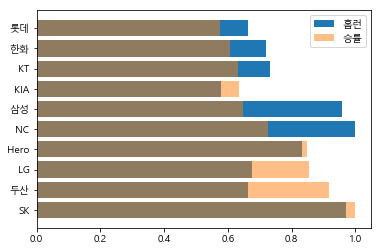

In [35]:
plt.rc('font', family = 'Malgun Gothic')
plt.barh(data.index, data['홈런']/data['홈런'].max(), label = '홈런')
plt.barh(data.index, data['승률']/data['승률'].max(), alpha=0.5, label = '승률')
plt.legend()

<BarContainer object of 10 artists>

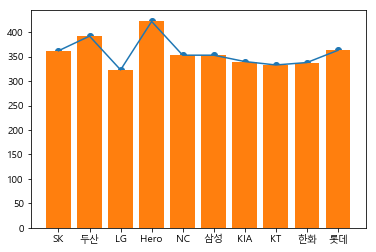

In [37]:
plt.plot(data.index, data['득점'])
plt.scatter(data.index, data['득점'])
plt.bar(data.index, data['득점'])

In [38]:
# 승률 bar 그래프로 그리고
# 승률과 홈런의 관계
# 팀별 득점점수
# 승률과 실점
# 나의 홈팀과 가장 유사한 성격의 팀을 찾아라

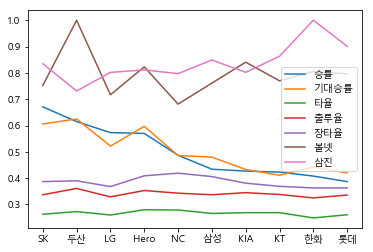

In [40]:
# % 승률, 기대승률, 타율, 출루율, 장타율
col = ['승률', '기대승률', '타율', '출루율', '장타율']
for c in col:
    plt.plot(data.index, data[c], label =c)
plt.plot(data.index, data['볼넷%']/data['볼넷%'].max() , label= '볼넷')
plt.plot(data.index, data['삼진%']/data['삼진%'].max() , label= '삼진')
plt.legend()

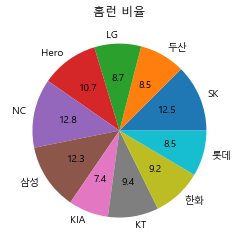

In [46]:
plt.title('홈런 비율')
p = plt.pie(data['홈런'], labels= data.index, autopct='%.1f')

(array([2., 1., 1., 2., 2., 0., 0., 1., 0., 1.]),
 array([4.25      , 4.35917722, 4.46835443, 4.57753165, 4.68670886,
        4.79588608, 4.90506329, 5.01424051, 5.12341772, 5.23259494,
        5.34177215]),
 <a list of 10 Patch objects>)

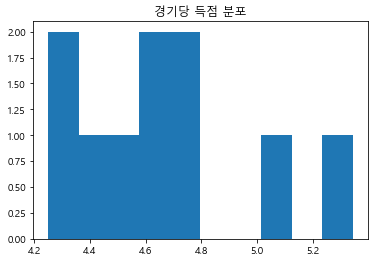

In [49]:
plt.title('경기당 득점 분포')
plt.hist(data.득점/data.경기, bins=10)

In [58]:
name = input('당신의 홈팀은 어디에요 : ')
name 

당신의 홈팀은 어디에요 : 두산


'두산'

In [59]:
home = data.loc[name]

In [ ]:
[100, 1] 
[110, 8] 절대값으로 비교 시 오차 10 + 7 = 17 
[120, 2] 절대값으로 비교 시 오차 20 + 1 = 21

In [62]:
# 정규화
data_normal = data/data.max()
data_normal.head()

,#,경기,승,무,패,승률,기대승률,R/G,득점,홈런,도루,볼넷%,삼진%,BABIP,타율,출루율,장타율,OPS,wOBA,WAR
팀명,,,,,,,,,,,,,,,,,,,,
SK,0.1,0.974684,1.000000,1.0,0.543478,1.000000,0.9696,0.880150,0.857820,0.971831,0.835821,0.752212,0.834906,0.929448,0.939286,0.933518,0.923628,0.950131,0.950867,0.602218
두산,0.2,0.987342,0.941176,0.0,0.652174,0.916542,1.0000,0.941948,0.928910,0.661972,0.776119,1.000000,0.731132,0.960123,0.975000,1.000000,0.930788,0.985564,1.000000,0.985447
LG,0.3,0.962025,0.843137,1.0,0.695652,0.853949,0.8352,0.795880,0.765403,0.676056,0.820896,0.716814,0.801887,0.929448,0.928571,0.911357,0.878282,0.914698,0.919075,0.361746
Hero,0.4,1.000000,0.882353,0.0,0.739130,0.849478,0.9552,1.000000,1.000000,0.830986,0.850746,0.823009,0.811321,1.000000,1.000000,0.977839,0.976134,1.000000,1.000000,1.000000
NC,0.5,0.962025,0.725490,0.0,0.847826,0.725782,0.7776,0.868914,0.836493,1.000000,0.552239,0.681416,0.797170,0.975460,0.996429,0.950139,1.000000,1.000000,0.988439,0.811504


In [71]:
home = data_normal.loc[name]
# 홈팀과 다른팀과의 차이, 차이가 작은 팀을 찾습니다.
차이 = np.sum(np.square(data_normal - home), axis =1)


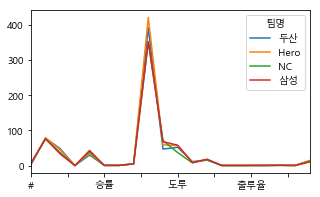

In [75]:
i = 차이.sort_values().index[:4]
data.loc[i].T.plot(figsize=(5,3))

In [64]:
home

#        0.200000
경기       0.987342
승        0.941176
무        0.000000
패        0.652174
승률       0.916542
기대승률     1.000000
R/G      0.941948
득점       0.928910
홈런       0.661972
도루       0.776119
볼넷%      1.000000
삼진%      0.731132
BABIP    0.960123
타율       0.975000
출루율      1.000000
장타율      0.930788
OPS      0.985564
wOBA     1.000000
WAR      0.985447
Name: 두산, dtype: float64

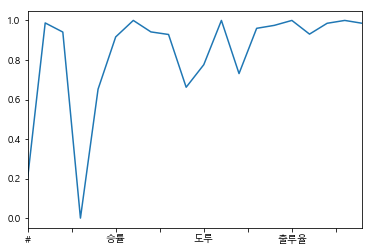

In [67]:
home.plot()

# 시험 문제 예시
1. 서울역의 시간대별로 승차인원 선 그래프를 그리세요
1. 아침 9~10 시 사이에 하차인원이 가장 많은 역 5개를 찾으세요
1. 승차인원에 비해서 하차 인원의 비율이 높은 역 5개를 찾으세요
1. 하루 중 승차인원이 가장 많은 시간은 언제입니까( 예) 1시~2시)
1. 무임 하차 비율이 가장 높은 역 5개를 찾으세요

In [193]:
df = pd.read_csv('subwaytime.csv', encoding='cp949', skiprows=1, index_col = 3)
df.shape

(597, 52)

In [194]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,승차,하차,승차.1,하차.1,승차.2,하차.2,승차.3,...,하차.19,승차.20,하차.20,승차.21,하차.21,승차.22,하차.22,승차.23,하차.23,Unnamed: 52
서울역,2019-05,1호선,150,"1,148",21,"11,958","10,579","15,684","61,286","44,585",...,"22,083","4,127","7,762",3,548,0,0,0,0,2019-06-03 10:56:25
시청,2019-05,1호선,151,89,5,"2,843","4,674","4,169","24,963","8,926",...,"4,767",931,"1,426",1,25,0,0,0,0,2019-06-03 10:56:25
종각,2019-05,1호선,152,116,3,"4,576","5,233","4,780","33,366","7,695",...,"5,882","3,973","1,565",1,1,0,0,0,0,2019-06-03 10:56:25
종로3가,2019-05,1호선,153,216,16,"5,505","3,036","4,790","16,235","7,163",...,"6,715","3,375","2,753",1,37,0,1,0,0,2019-06-03 10:56:25
종로5가,2019-05,1호선,154,51,3,"2,245","4,205","3,415","19,150","6,140",...,"3,661",810,"1,200",0,6,0,0,0,0,2019-06-03 10:56:25
동대문,2019-05,1호선,155,776,12,"17,333","2,452","12,614","9,043","19,979",...,"14,421","1,199","5,052",1,68,0,0,0,0,2019-06-03 10:56:25
신설동,2019-05,1호선,156,315,38,"11,021","2,103","11,002","9,714","22,990",...,"13,402",681,"3,383",0,39,0,0,0,0,2019-06-03 10:56:25
제기동,2019-05,1호선,157,360,6,"5,600","2,439","10,512","10,759","26,059",...,"9,194",393,"2,120",0,0,0,0,0,0,2019-06-03 10:56:25
청량리(서울시립대입구),2019-05,1호선,158,"1,430",9,"13,965","3,611","19,600","13,875","50,958",...,"20,670",547,"6,585",0,2,0,1,0,0,2019-06-03 10:56:25
동묘앞,2019-05,1호선,159,136,11,"3,712",876,"3,992","4,354","7,349",...,"5,014",304,"3,516",5,298,0,0,0,0,2019-06-03 10:56:25


In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 597 entries, 서울역 to 신설동
Data columns (total 48 columns):
승차       597 non-null object
하차       597 non-null int64
승차.1     597 non-null object
하차.1     597 non-null object
승차.2     597 non-null object
하차.2     597 non-null object
승차.3     597 non-null object
하차.3     597 non-null object
승차.4     597 non-null object
하차.4     597 non-null object
승차.5     597 non-null object
하차.5     597 non-null object
승차.6     597 non-null object
하차.6     597 non-null object
승차.7     597 non-null object
하차.7     597 non-null object
승차.8     597 non-null object
하차.8     597 non-null object
승차.9     597 non-null object
하차.9     597 non-null object
승차.10    597 non-null object
하차.10    597 non-null object
승차.11    597 non-null object
하차.11    597 non-null object
승차.12    597 non-null object
하차.12    597 non-null object
승차.13    597 non-null object
하차.13    597 non-null object
승차.14    597 non-null object
하차.14    597 non-null object
승차.15    597 non-null object


In [196]:
data = df.iloc[:, 3:-1] # 가산점
data

,승차,하차,승차.1,하차.1,승차.2,하차.2,승차.3,하차.3,승차.4,하차.4,...,승차.19,하차.19,승차.20,하차.20,승차.21,하차.21,승차.22,하차.22,승차.23,하차.23
서울역,"1,148",21,"11,958","10,579","15,684","61,286","44,585","115,354","89,357","238,583",...,"37,939","22,083","4,127","7,762",3,548,0,0,0,0
시청,89,5,"2,843","4,674","4,169","24,963","8,926","74,288","11,999","207,024",...,"14,946","4,767",931,"1,426",1,25,0,0,0,0
종각,116,3,"4,576","5,233","4,780","33,366","7,695","108,663","12,735","295,205",...,"48,067","5,882","3,973","1,565",1,1,0,0,0,0
종로3가,216,16,"5,505","3,036","4,790","16,235","7,163","33,766","12,372","88,664",...,"29,318","6,715","3,375","2,753",1,37,0,1,0,0
종로5가,51,3,"2,245","4,205","3,415","19,150","6,140","46,654","10,238","132,023",...,"11,544","3,661",810,"1,200",0,6,0,0,0,0
동대문,776,12,"17,333","2,452","12,614","9,043","19,979","17,282","26,926","33,995",...,"9,553","14,421","1,199","5,052",1,68,0,0,0,0
신설동,315,38,"11,021","2,103","11,002","9,714","22,990","30,373","32,986","78,975",...,"6,614","13,402",681,"3,383",0,39,0,0,0,0
제기동,360,6,"5,600","2,439","10,512","10,759","26,059","22,594","37,545","50,517",...,"4,686","9,194",393,"2,120",0,0,0,0,0,0
청량리(서울시립대입구),"1,430",9,"13,965","3,611","19,600","13,875","50,958","22,529","67,407","47,066",...,"8,555","20,670",547,"6,585",0,2,0,1,0,0
동묘앞,136,11,"3,712",876,"3,992","4,354","7,349","13,980","10,925","33,547",...,"2,725","5,014",304,"3,516",5,298,0,0,0,0


In [197]:
data =data.replace(',', '', regex=True) # 콤마 없애기

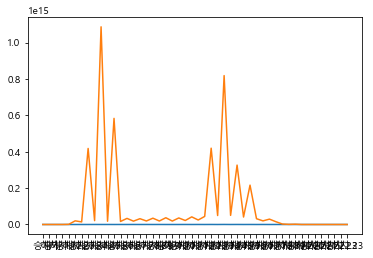

In [198]:
#data.loc['서울역']
#서울역이 여러개다 더하자
seoul = data.loc['서울역']
plt.plot(np.sum(seoul[::2], axis=0)) #짝수 : 승차
plt.plot(np.sum(seoul[1::2], axis=0)) #홀수 : 하차

In [199]:
data = data.astype(np.int) # 정수로 변환

2.  아침 9~10시 사이에 하차인원이 가장 많은 역 5개를 찾으세요

In [200]:
col = 11
morning_10_off = data.iloc[:, col]
morning_10_off

서울역             171350
시청               93843
종각              165873
종로3가            101464
종로5가             82787
동대문              33416
신설동              44845
제기동              49387
청량리(서울시립대입구)     47716
동묘앞              21482
시청               94153
을지로입구           169109
을지로3가            86952
을지로4가            42668
동대문역사문화공원        46570
신당               29126
상왕십리             22536
왕십리(성동구청)        25402
한양대              77921
뚝섬               66527
성수              105565
건대입구             60312
구의(광진구청)         28344
강변(동서울터미널)       63130
잠실나루             33192
잠실(송파구청)        194094
잠실새내             35717
종합운동장            27825
삼성(무역센터)        285440
선릉              235595
                 ...  
공항화물청사            4705
인천공항1터미널         28043
인천공항2터미널          8842
영종                2707
언주               39279
선정릉              40109
삼성중앙             24609
봉은사              70984
종합운동장             8639
삼전                5691
석촌고분              6079
석촌                7044
송파나루       

In [201]:
y = morning_10_off.sort_values(ascending=False)[:5]
y

강남          372474
삼성(무역센터)    285440
역삼          285044
선릉          235595
가산디지털단지     216339
Name: 하차.5, dtype: int32

<BarContainer object of 5 artists>

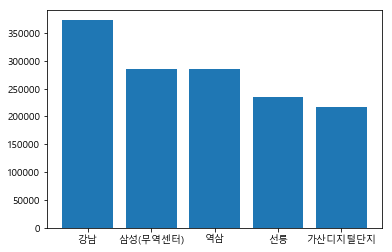

In [202]:
plt.bar(y.index, y)

3. 승차인원에 비해서 하차인원의 비율이 높은 역 5개를 찾으세요

In [203]:
data.head()

,승차,하차,승차.1,하차.1,승차.2,하차.2,승차.3,하차.3,승차.4,하차.4,...,승차.19,하차.19,승차.20,하차.20,승차.21,하차.21,승차.22,하차.22,승차.23,하차.23
서울역,1148,21,11958,10579,15684,61286,44585,115354,89357,238583,...,37939,22083,4127,7762,3,548,0,0,0,0
시청,89,5,2843,4674,4169,24963,8926,74288,11999,207024,...,14946,4767,931,1426,1,25,0,0,0,0
종각,116,3,4576,5233,4780,33366,7695,108663,12735,295205,...,48067,5882,3973,1565,1,1,0,0,0,0
종로3가,216,16,5505,3036,4790,16235,7163,33766,12372,88664,...,29318,6715,3375,2753,1,37,0,1,0,0
종로5가,51,3,2245,4205,3415,19150,6140,46654,10238,132023,...,11544,3661,810,1200,0,6,0,0,0,0


In [204]:
# 짝수,: 승자, 홀수 : 하차
data.head()
승차 = data.iloc[:, ::2]
하차 = data.iloc[:, 1::2]


In [205]:
승차합 = np.sum(승차, axis=1)
하차합 = np.sum(하차, axis=1)
비율 = 하차합/승차합

In [206]:
비율.sort_values(ascending=False)[:5]

서울역      1.730587
인천       1.688396
선릉       1.683228
고속터미널    1.540680
공덕       1.317531
dtype: float64

4. 하루 중 승차 인원이 가장 많은 시간은 언제입니까 


In [207]:
승하차인원 = np.sum(data, axis = 0)
# 승차인원 : 짝수위치
승차인원 = 승하차인원[::2]

4 + np.argmax(승차인원.values), '시'

(18, '시')

In [209]:
승차인원.values

array([  136144,  3586585,  7173093, 18673526, 21660035, 14028472,
       10597036, 10488157, 11472241, 11989828, 11825103, 13071881,
       15115972, 18553044, 24606001, 14232425, 11346789, 10917666,
        9124017,  4163994,   575460,      456,      128,        0],
      dtype=int64)

In [171]:
df = pd.read_csv('subwayfee.csv', encoding = 'cp949', index_col=3, skiprows= 0)
df.shape

(597, 8)

In [172]:
subway = df.iloc[:, 3:-1]

In [173]:
subway = subway.replace(',', '', regex=True)
subway = subway.astype(int)

In [174]:
subway.head()

,유임승차,유임하차,무임승차,무임하차
지하철역,,,,
서울역,1568570,1489737,247801,242107
시청,709821,727110,112279,112016
종각,1204910,1151371,176083,164915
종로3가,699000,647664,408682,382809
종로5가,561662,578374,307515,295535


In [175]:
유임하차 = subway['유임하차']
무임하차 = subway['무임하차']
비율 = 무임하차/유임하차

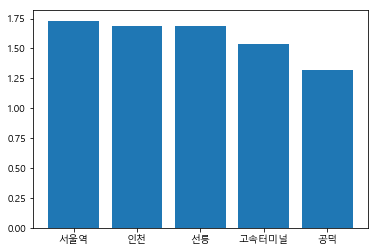

In [210]:
y = 비율.sort_values(ascending=False)[:5]
m = plt.bar(y.index, y)
#m = plt.pie(y, labels = y , autopct = '%d')